In [11]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy
sys.path.append(os.pardir)

%load_ext autoreload
%autoreload 2   

import rt1raytrace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
rt1plotpy

<module 'rt1plotpy' from 'c:\\Users\\uedak\\anaconda3\\lib\\site-packages\\rt1plotpy\\__init__.py'>

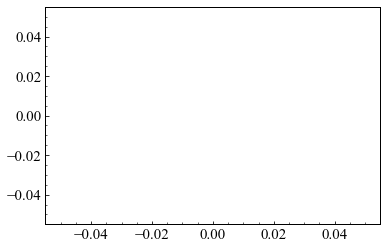

In [4]:
plt.plot([0])

In [20]:

ax_kwargs = {'xlim'  :(0,1.1),
             'ylim'  :(-0.7,0.7), 
             'aspect': 'equal'
                }

In [21]:
n0 = 2#25.99e16*0.8/2
a  = 1.348
b  = 0.5
rmax = 0.4577

def gaussian(r,z,n0=n0,a=a,b=b,rmax=rmax):
    psi = rt1plotpy.mag.psi(r,z)
    br, bz = rt1plotpy.mag.bvec(r,z)
    b_abs = np.sqrt(br**2+bz**2)
    psi_rmax = rt1plotpy.mag.psi(rmax,0)
    psi0 = rt1plotpy.mag.psi(1,0)
    b0 = rt1plotpy.mag.b0(r,z)
    return n0 * np.exp(-a*(psi-psi_rmax)**2/psi0**2)*(b_abs/b0)**(-b) 

def Length_scale_sq(r,z):
    return 0.0001/(gaussian(r,z)+ 0.05)

def Length_scale(r,z):
    return np.sqrt( Length_scale_sq(r,z))


In [22]:
RT1_kernel = rt1kernel.Kernel2D_scatter(dxf_file='../dxf_files/simplest0.dxf',show_print=False)

r_plot = np.linspace(0.05,1.05,500)
z_plot = np.linspace(-0.7,0.7,500)
mask1, im_kwargs1 = RT1_kernel.grid_input(R=r_plot,Z=z_plot)
RT1_kernel.set_bound_space(delta_l=5e-3)

RT1_kernel.set_induced_point(**np.load('inducing-point_20220610.npz'),length_sq_fuction=Length_scale_sq)
RT1_kernel.set_grid_interface( z_plot   =np.linspace(-0.7,0.7,150 ), r_plot   =np.linspace(0.05,1.05,150),
                           z_plot_HD=np.linspace(-0.7,0.7,500), r_plot_HD=np.linspace(0.05,1.05,500))



you have to "create_induced_point()" or "set_induced_point()" next.


Arcs  detection: 100%|██████████| 9/9 [00:00<00:00, 12.13it/s]


num of bound point is  932


TypeError: set_induced_point() got an unexpected keyword argument 'z'

In [15]:
a = np.load('inducing-point_20220610.npz')



array([0.49922461, 0.4481991 , 0.36815908, ..., 0.53524262, 0.55575288,
       0.52023512])

In [13]:
np.load('inducing-point_20220610.npz')


In [24]:

def Length_scale_sq(r,z):
    return 0.0001/(gaussian(r,z)+ 0.05)

RT1_kernel.create_induced_point(
    r_grid=np.linspace(0.05,1.05,2000),
    z_grid=np.linspace(-0.7,0.7,2000),
    length_sq_fuction=Length_scale_sq)
pass

Arcs  detection: 100%|██████████| 9/9 [00:28<00:00,  3.20s/it]


100%|██████████| 2000/2000 [00:16<00:00, 123.15it/s]

num of induced point is  4083


Arcs  detection: 100%|██████████| 9/9 [00:00<00:00,  9.39it/s]



num of bound point is  229


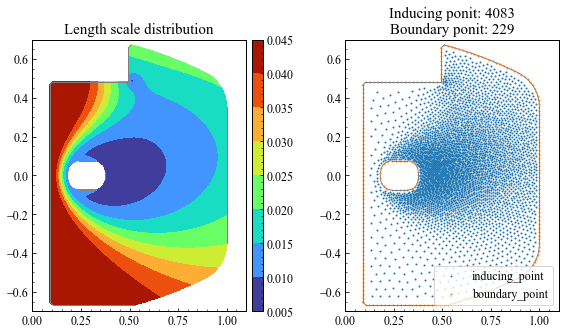

In [25]:
#%matplotlib qt
%matplotlib inline
RT1_kernel.save_inducing_point('inducing-point_20220610',is_plot=True)